In [1]:
# import the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
from sklearn.preprocessing import PolynomialFeatures

warnings.filterwarnings("ignore")

### Load the dataset

- Load the train data and using all your knowledge of pandas try to explore the different statistical properties of the dataset.

In [2]:
# read the dataset and extract the features and target separately

data = pd.read_csv('.\Pandas Test\Fifa Project\Fifa train.csv')


In [3]:
data.head()

,Id,Name,Age,Nationality,Overall,Potential,Club,Value (M),Wage (M),Position
0,17221,F. Burdenski,25,Germany,54,58,Korona Kielce,0.07,0.001,CDM
1,11353,A. Deiola,21,Italy,64,73,Cagliari,0.70,0.010,CM
2,3402,T. Castagne,21,Belgium,72,79,Atalanta,3.70,0.013,RB
3,16071,D. Gorman,21,Northern Ireland,57,66,Stevenage,0.16,0.002,CM
4,12380,N. Molina Lucero,19,Argentina,63,75,Boca Juniors,0.55,0.002,LB


In [4]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num_data = data.select_dtypes(include=numerics)


In [5]:
num_data = num_data.drop(['Id'], axis = 1)
num_data.describe()

,Age,Overall,Potential,Value (M),Wage (M)
count,14384.000000,14384.000000,14384.000000,14384.000000,14384.000000
mean,25.148776,66.237695,71.181869,2.344967,0.011435
std,4.620911,6.954458,6.074111,5.105376,0.022614
min,16.000000,46.000000,46.000000,0.000000,0.000000
25%,21.000000,62.000000,67.000000,0.300000,0.002000
50%,25.000000,66.000000,71.000000,0.675000,0.004000
75%,28.000000,71.000000,75.000000,2.100000,0.012000
max,47.000000,94.000000,94.000000,105.000000,0.565000


### Visualize the data

- Check for the categorical & continuous features. 
- Check out the best plots for plotting between categorical target and continuous features and try making some inferences from these plots.
- Check for the correlation between the features

IndexError: index 5 is out of bounds for axis 0 with size 5

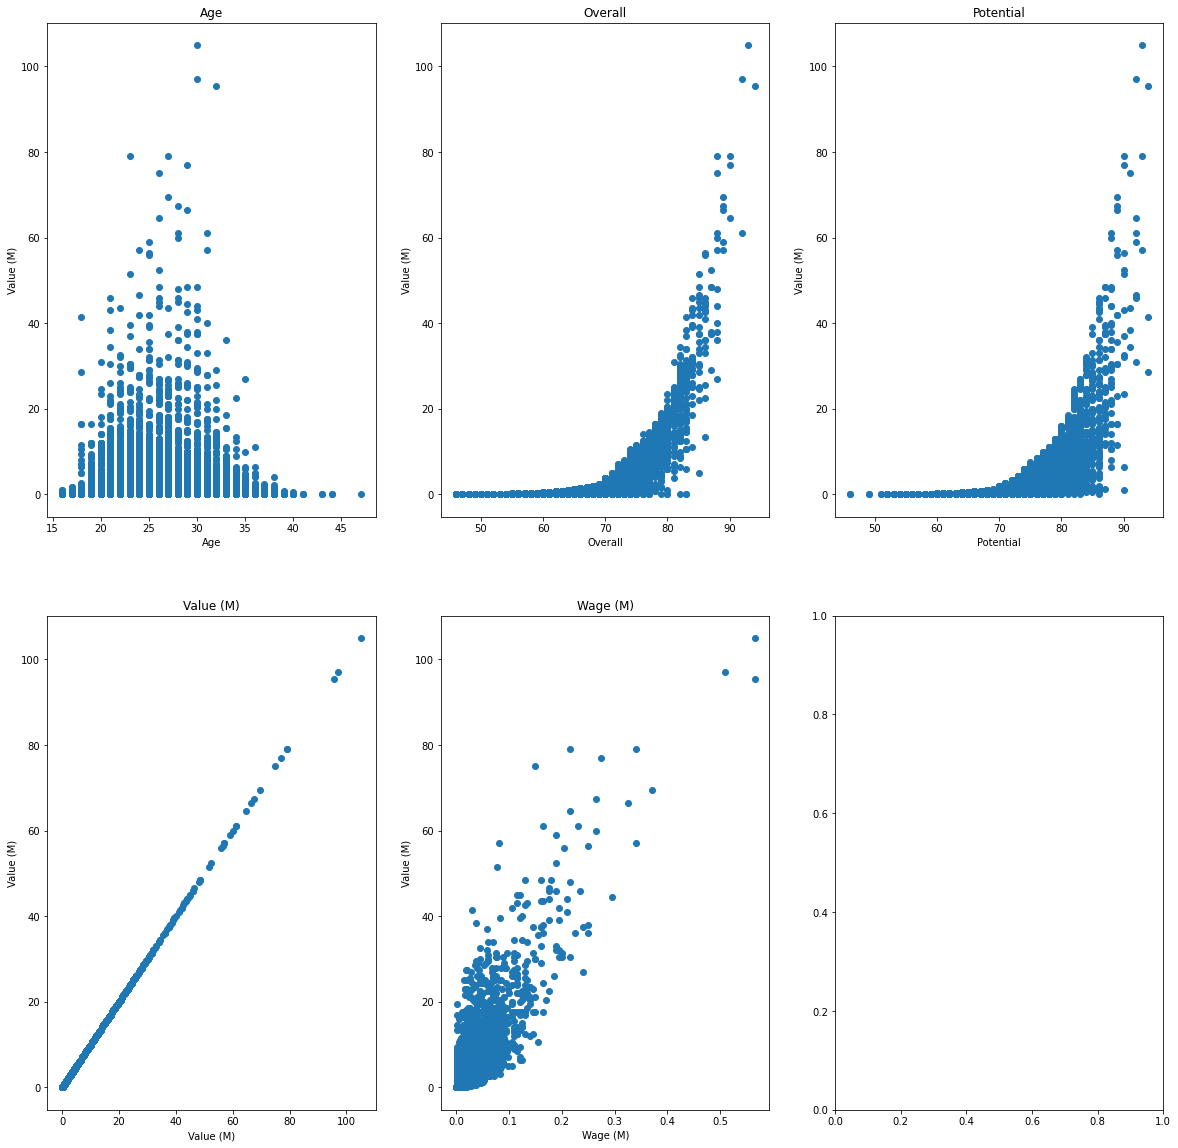

In [13]:
# Code Starts here


#chart Data
cols = num_data.columns
fig, axes = plt.subplots(nrows = 2, ncols= 3, figsize = (20, 20))

for i in range(0,3):             
    for j in range(0, 3):         
            col = cols[i*3 + j]
            axes[i,j].set_title(col)
            axes[i,j].scatter(num_data[col], num_data['Value (M)'])
            axes[i,j].set_xlabel(col) 
            axes[i,j].set_ylabel('Value (M)')


# Code ends here

In [ ]:
#Correlation

corr = num_data.corr()
print(corr.round(2)) 


### Model building

- Separate the features and target and then split the train data into train and validation set.
- Now let's come to the actual task, using linear regression, predict the `Value (M)`. 
- Try improving upon the `r2_score` (R-Square) using different parameters that give the best score. You can use higher degree [Polynomial Features of sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) to improve the model prediction. 



In [ ]:

# independent variables
X = data[['Overall','Potential','Wage (M)']]

# dependent variables
y = data['Value (M)'].copy()

# Split the dataset    
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=10)

In [ ]:
# Instantiate linear regression
model = LinearRegression()

# fit the model on training data
model.fit(X_train,y_train)


# make prediction
y_pred = model.predict(X_test)

#Calcualte MSE for regression
mse = round(mean_squared_error(y_test, y_pred),2)
print(f'MSE is {mse}')

# calculate the r2 score
r2 = r2_score(y_test, y_pred)
print("R2 score: ",r2)

In [ ]:
#polynomial regression
poly = PolynomialFeatures(degree=3)
   
# fit and transform polynomial features on X_train    
X_train_2 = poly.fit_transform(X_train)

# instantiate Linear regression model
model=LinearRegression()

# fit the model 
model.fit(X_train_2,y_train)
    
# transform on x_test    
X_test_2 = poly.transform(X_test)

# predict the model performance
y_pred_2=model.predict(X_test_2)

#Calcualte MSE
mse = round(mean_squared_error(y_test, y_pred_2),2)
print(f'MSE is {mse}')


# calculate the r2 score
r2= r2_score(y_test, y_pred_2)
print("R2 score: ",r2)


### Prediction on the test data and creating the sample submission file.

- Load the test data and store the `Id` column in a separate variable.
- Perform the same operations on the test data that you have performed on the train data.
- Create the submission file as a `csv` file consisting of the `Id` column from the test data and your prediction as the second column.

In [ ]:
# Code Starts here

data_pred = pd.read_csv('.\Pandas Test\Fifa Project\Fifa test.csv')

submission = pd.DataFrame(data_pred['Id'].copy())
data_pred = data_pred.drop(['Id'], axis=1)


data_pred_test = data_pred[['Overall','Potential','Wage (M)']].copy()
data_pred_test.head()

# transform pred test   
data_pred_test = poly.transform(data_pred_test)

y_pred_value = np.round(model.predict(data_pred_test),2)
#Convert to PD data frame
y_pred_value_pd =  pd.DataFrame(y_pred_value)


#Transfer data to Submission file
submission['Value (M)'] = y_pred_value

#Save sumbission file
submission.to_csv('.\Pandas Test\Fifa Project\submission.csv', index = False)

# Code ends here